# 書籍 Pythonではじめる機械学習 をハンズオン的にやる

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# anaconda3/binに移動してから./pip install mglearnで入れたら認識された
import mglearn

%matplotlib inline

### 学習用データの読み込み

デファクトスタンダード的になっている機械学習用の初学者用のデータセットをロードする。

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

### キー一覧の表示

ハッシュになっていてキーごとに値が入っている。まずはそのハッシュのキーを確認する。

In [3]:
print('keys of iris_dataset: \n{}'.format(iris_dataset.keys()))

keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


### 説明文の表示

In [4]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### 特徴量名一覧

sepalは「がく」のこと。petalは「花びら」のこと。

In [5]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### データ

上記の４つの特徴量のリスト。

In [6]:
print(iris_dataset['data'])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

### 正解値

上記のデータに対応する品種を表す値。

In [7]:
print(iris_dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 正解値に対応する品種名

In [8]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']



これで学習用データのロードと、その中身の確認は完了。

### データの整理

学習用とテスト用にデータを分割する。scikit-learnには超絶便利な関数あり。

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

## 可視化

対象とするデータがどんなものなのかを知るのは極めて大事。
そのための有効な手段は可視化。
なかでも散布図でみるとどのような数値データが含まれているのかがよくわかる。

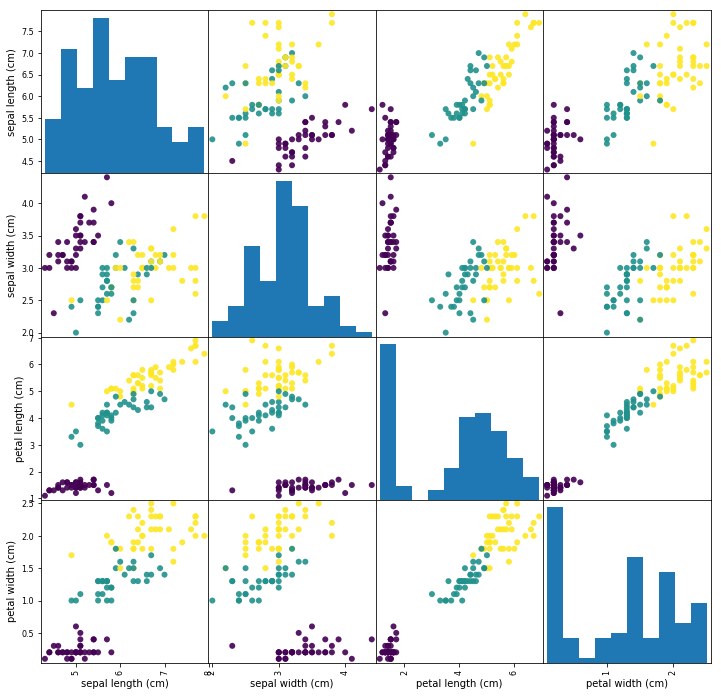

In [10]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
dummy = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, marker='o', alpha=0.9, figsize=(12,12))

## 機械学習

k-最近傍法での分類をやってみる。

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

できあがったモデルを使って、ためしに適当な値を入れて品種を予想してみる。

In [12]:
prediction = knn.predict(np.array([[5,2.9,1,0.2]]))
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset["target_names"][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


なにかしらの計算ができることは確認できたので、つくっておいたテストデータで検証してみる

In [13]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97


X.shape: (26, 2)


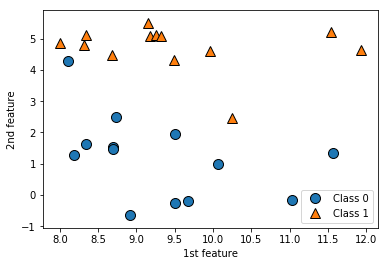

In [14]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

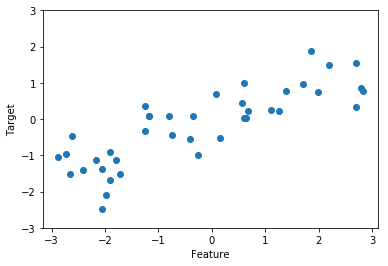

In [15]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, "o")
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

## 教師あり機械学習

X.shape: (26, 2)


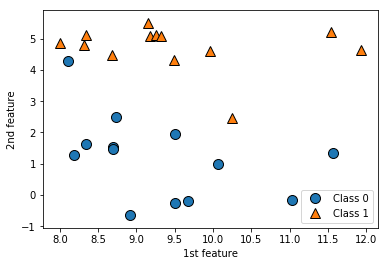

In [16]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'target')

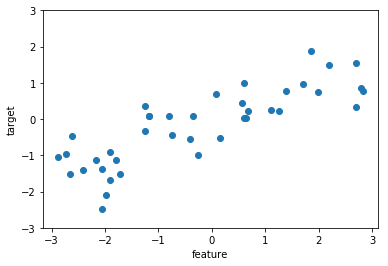

In [17]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, "o")
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")

In [22]:
from sklearn.datasets import load_breast_cancer # ウィスコンシン乳癌データセット
cancer = load_breast_cancer()
print("cancer.keys(): \n\t{}".format(cancer.keys()))
print("cancer.data.shape: \n\t{}".format(cancer.data.shape))
print("# of samples:\n\t{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("features:\n\t{}".format(cancer.feature_names))

cancer.keys(): 
	dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
cancer.data.shape: 
	(569, 30)
# of samples:
	{'malignant': 212, 'benign': 357}
features:
	['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [23]:
from sklearn.datasets import load_boston # 1970年代のボストン郊外の住宅価格
boston = load_boston()
print("boston.data.shape:\n\t{}".format(boston.data.shape))

boston.data.shape:
	(506, 13)


In [24]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### k-最近傍法によるクラス分類

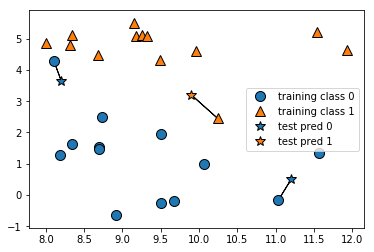

In [25]:
# forgeデータセットのクラス分類
mglearn.plots.plot_knn_classification(n_neighbors=1)

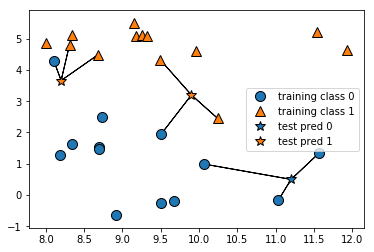

In [28]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

test set predictions: [1 0 1 0 1 0 0]
test set accuracy: 0.86


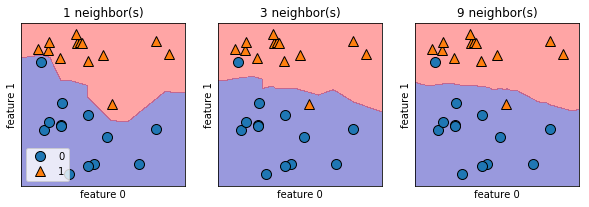

In [38]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

print("test set predictions: {}".format(clf.predict(X_test)))
print("test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)